# Validator Yield Surface

In [2]:
import setup

time: 12.7 ms (started: 2021-05-18 14:34:30 +02:00)


In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pd.options.plotting.backend = "plotly"

time: 909 ms (started: 2021-05-18 14:34:30 +02:00)


In [4]:
from experiments.run import run
import visualizations as visualizations

time: 923 ms (started: 2021-05-18 14:34:31 +02:00)


In [5]:
from experiments.validator_yield_surface.experiment import experiment

time: 22.1 ms (started: 2021-05-18 14:34:32 +02:00)


In [6]:
import logging

logger = logging.getLogger()
logger.disabled = True

df, exceptions = run()

time: 1.21 s (started: 2021-05-18 14:34:32 +02:00)


In [7]:
df

,phase,timestamp,eth_price,eth_supply,eth_staked,supply_inflation,network_issuance,pow_issuance,number_of_validators_in_activation_queue,average_effective_balance,...,supply_inflation_pct,total_revenue_yields_pct,total_profit_yields_pct,total_online_validator_rewards_eth,total_tips_to_validators_eth,source_reward_eth,target_reward_eth,head_reward_eth,block_proposer_reward_eth,sync_reward_eth
1,2.0,2021-05-18 14:34:31.983032,100.0,1.207220e+08,3.868555e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,8.004659,5.992245,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
3,2.0,2021-05-18 14:34:31.983032,100.0,1.207220e+08,4.072163e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,7.604426,5.692633,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
5,2.0,2021-05-18 14:34:31.983032,100.0,1.207220e+08,4.275771e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,7.242311,5.421555,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
7,2.0,2021-05-18 14:34:31.983032,100.0,1.207220e+08,4.479379e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,6.913115,5.175121,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
9,2.0,2021-05-18 14:34:31.983032,100.0,1.207220e+08,4.682988e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,6.612545,4.950115,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,2.0,2021-05-18 14:34:31.983032,3000.0,1.207220e+08,6.922677e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,4.473192,4.202205,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
793,2.0,2021-05-18 14:34:31.983032,3000.0,1.207220e+08,7.126286e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,4.345387,4.082142,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
795,2.0,2021-05-18 14:34:31.983032,3000.0,1.207220e+08,7.329894e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,4.224681,3.968749,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246
797,2.0,2021-05-18 14:34:31.983032,3000.0,1.207220e+08,7.533502e+06,0.045514,5.183178e+06,60.222222,230,3.200000e+10,...,4.551445,4.110501,3.861486,305218.26189,0.0,58006.66869,116013.337379,58006.66869,39347.620747,38671.11246


time: 73.4 ms (started: 2021-05-18 14:34:33 +02:00)


In [42]:
grouped = df.groupby(["eth_price", "eth_staked"]).last()["total_profit_yields_pct"]
grouped

eth_price  eth_staked  
100.0      3.868555e+06    5.992245
           4.072163e+06    5.692633
           4.275771e+06    5.421555
           4.479379e+06    5.175121
           4.682988e+06    4.950115
                             ...   
3000.0     6.922677e+06    4.202205
           7.126286e+06    4.082142
           7.329894e+06    3.968749
           7.533502e+06    3.861486
           7.737110e+06    3.759868
Name: total_profit_yields_pct, Length: 400, dtype: float64

time: 37.4 ms (started: 2021-05-18 15:14:08 +02:00)


In [43]:
x = df.groupby(["run"]).first()["eth_price"].unique()
y = df.groupby(["run"]).first()["eth_staked"].unique()
z = []

for eth_staked in y:
    row = []
    for eth_price in x:
        z_value = grouped[eth_price][eth_staked]
        row.append(z_value)
    z.append(row)

time: 112 ms (started: 2021-05-18 15:14:08 +02:00)


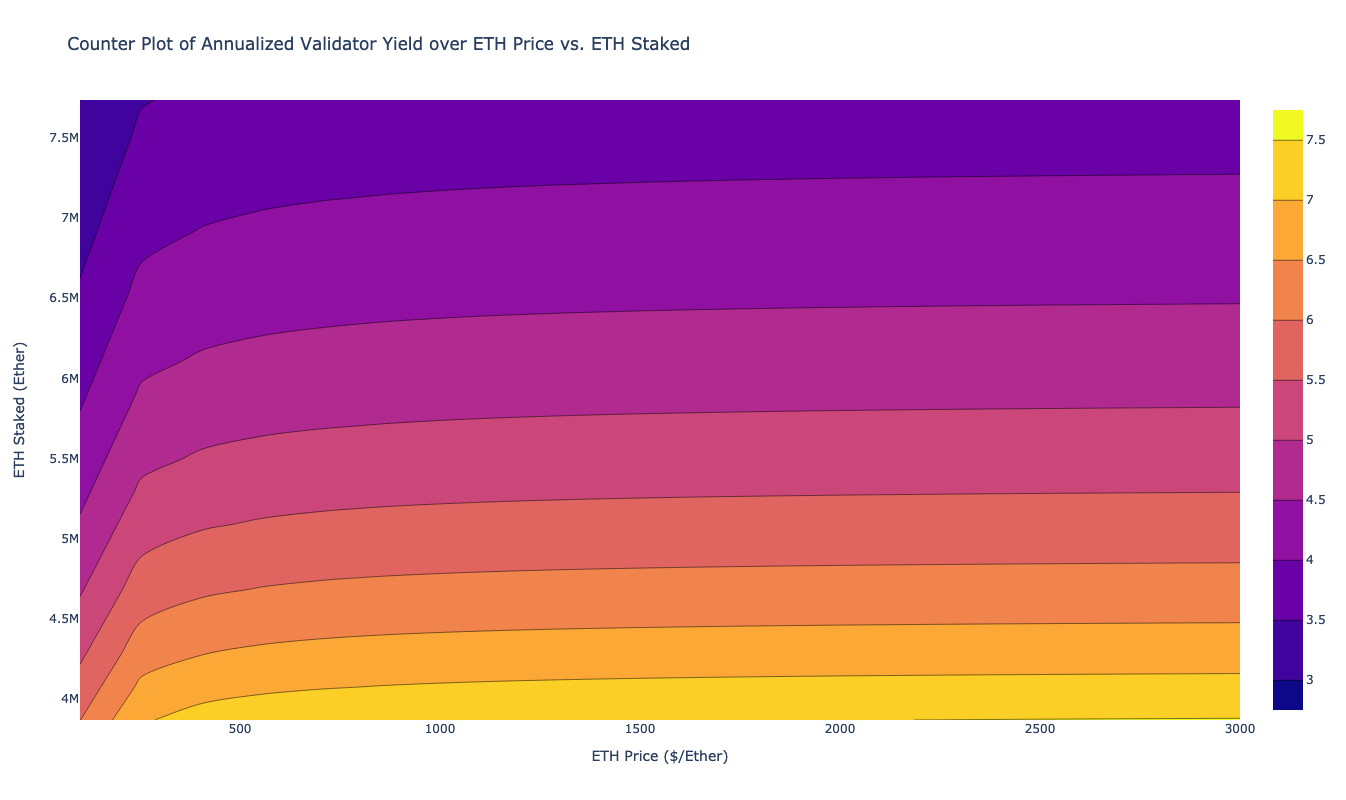

time: 136 ms (started: 2021-05-18 15:14:09 +02:00)


In [44]:
fig = visualizations.plot_validator_environment_yield_contour(x, y, z)
pio.write_image(fig, "../outputs/validator_yield_contour.png", width=1080, height=720)
fig.show()

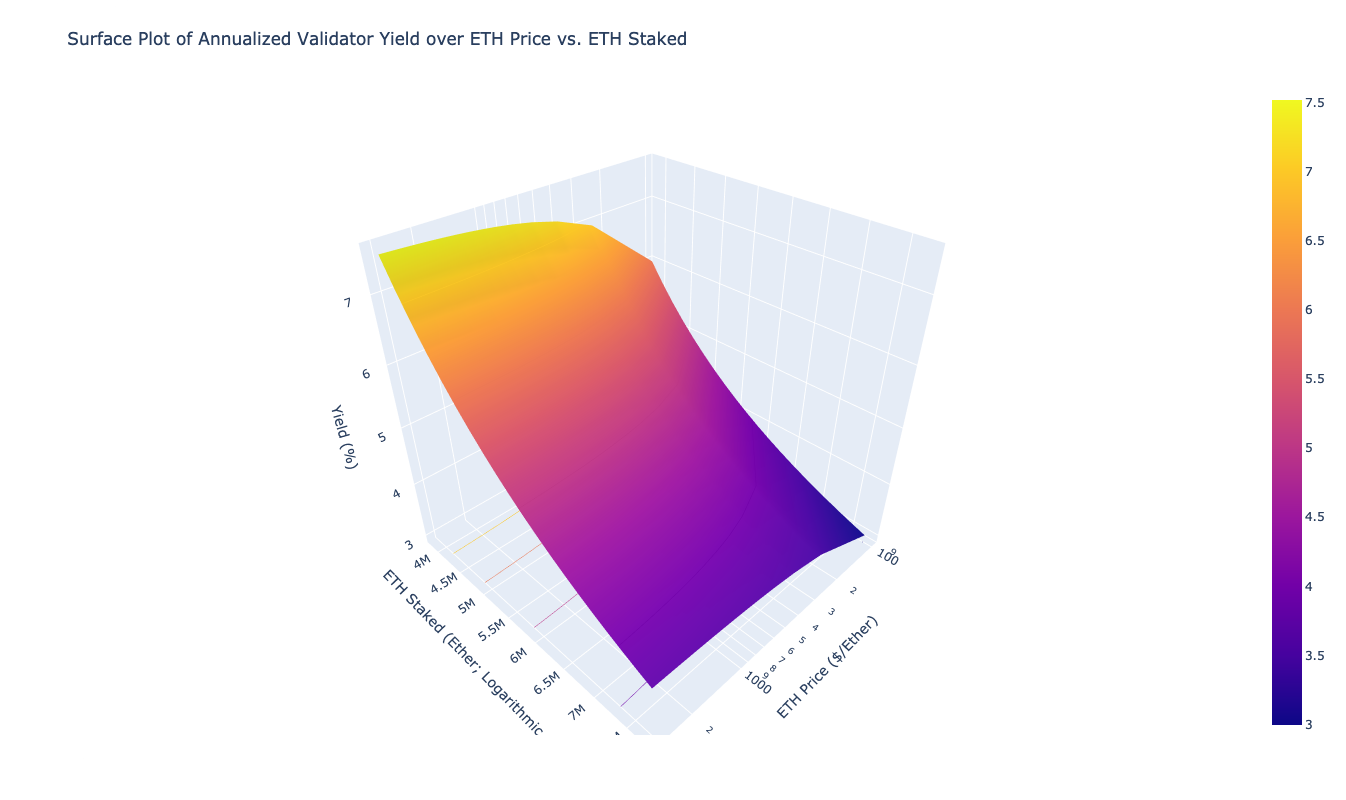

time: 114 ms (started: 2021-05-18 15:06:29 +02:00)


In [35]:
visualizations.plot_validator_environment_yield_surface(x, y, z)